# Retrieving the Data

## Load Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import plotly.offline as py
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
import plotly.tools as tls
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing, model_selection, metrics
import statsmodels.api as sm
import time
from sklearn.ensemble import RandomForestRegressor

In [3]:
print("Current Working Directory: ", os.getcwd())

Current Working Directory:  /Users/sergigomezpalleja/code_sergi/KaggleAvito/avitodemand


## Read the Data

In [4]:
train = pd.read_csv("train.csv", parse_dates=['activation_date'])
test = pd.read_csv("test.csv", parse_dates = ['activation_date'])

In [28]:
print("size of train data :", train.shape)
print("size of test data", test.shape)
#print("size of periods_train data", periods_train.shape)
#print("size of periods_test data", periods_test.shape)

size of train data : (1503424, 18)
size of test data (508438, 17)


# Glimpse of Data

## Overview of Tables

In [10]:
train.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability,set
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789,train
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000,train
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177,train
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323,train
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797,train


## Statistical overview of the Data

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503424 entries, 0 to 1503423
Data columns (total 18 columns):
item_id                 1503424 non-null object
user_id                 1503424 non-null object
region                  1503424 non-null object
city                    1503424 non-null object
parent_category_name    1503424 non-null object
category_name           1503424 non-null object
param_1                 1441848 non-null object
param_2                 848882 non-null object
param_3                 640859 non-null object
title                   1503424 non-null object
description             1387148 non-null object
price                   1418062 non-null float64
item_seq_number         1503424 non-null int64
activation_date         1503424 non-null datetime64[ns]
user_type               1503424 non-null object
image                   1390836 non-null object
image_top_1             1390836 non-null float64
deal_probability        1503424 non-null float64
dtypes: datetim

In [7]:
train.describe()

,price,item_seq_number,image_top_1,deal_probability
count,1.418062e+06,1.503424e+06,1.390836e+06,1.503424e+06
mean,3.167081e+05,7.436740e+02,1.241932e+03,1.391306e-01
std,6.689154e+07,5.572522e+03,9.704641e+02,2.600785e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,5.000000e+02,9.000000e+00,4.250000e+02,0.000000e+00
50%,1.300000e+03,2.900000e+01,1.057000e+03,0.000000e+00
75%,7.000000e+03,8.800000e+01,2.217000e+03,1.508700e-01
max,7.950101e+10,2.044290e+05,3.066000e+03,1.000000e+00


In [8]:
train.describe(include = ["O"])

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,user_type,image
count,1503424,1503424,1503424,1503424,1503424,1503424,1441848,848882,640859,1503424,1387148,1503424,1390836
unique,1503424,771769,28,1733,9,47,371,271,1219,788377,1317102,3,1390836
top,47f183ff075c,45ba3f23bf25,Краснодарский край,Краснодар,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Обувь,Вторичка,Платье,В хорошем состоянии,Private,43d3bc60613c55b174b451c1f284407bb6fa4f663495a3...
freq,1,1080,141416,63638,697623,282753,226289,150450,50615,15550,2249,1075706,1


In [22]:
#Max value of the Activation Date in the Train Set
print("Max value Activation Date Train Set: ", train.activation_date.max())
#Min value of the Activation Date in the Test Set
print("Min value Activation Date Test Set: ", test.activation_date.min())
# Important! There is no overlap in the Train and Test set so we are predicting future dates!

Max value Activation Date Train Set:  2017-04-07 00:00:00
Min value Activation Date Test Set:  2017-04-12 00:00:00


In [11]:
df.loc[(df['set'] == 'train') | (df['set'] =='val')]['activation_date'].unique()

array(['2017-03-28T00:00:00.000000000', '2017-03-26T00:00:00.000000000',
       '2017-03-20T00:00:00.000000000', '2017-03-25T00:00:00.000000000',
       '2017-03-16T00:00:00.000000000', '2017-03-23T00:00:00.000000000',
       '2017-03-17T00:00:00.000000000', '2017-03-22T00:00:00.000000000',
       '2017-03-19T00:00:00.000000000', '2017-03-21T00:00:00.000000000',
       '2017-03-27T00:00:00.000000000', '2017-03-18T00:00:00.000000000',
       '2017-03-24T00:00:00.000000000', '2017-03-15T00:00:00.000000000',
       '2017-03-29T00:00:00.000000000', '2017-04-02T00:00:00.000000000',
       '2017-04-07T00:00:00.000000000', '2017-04-01T00:00:00.000000000',
       '2017-03-31T00:00:00.000000000', '2017-03-30T00:00:00.000000000',
       '2017-04-03T00:00:00.000000000'], dtype='datetime64[ns]')

In [12]:
df.loc[(df['set'] == 'test')]['activation_date'].unique()

array(['2017-04-18T00:00:00.000000000', '2017-04-16T00:00:00.000000000',
       '2017-04-17T00:00:00.000000000', '2017-04-15T00:00:00.000000000',
       '2017-04-12T00:00:00.000000000', '2017-04-13T00:00:00.000000000',
       '2017-04-14T00:00:00.000000000', '2017-04-19T00:00:00.000000000',
       '2017-04-20T00:00:00.000000000'], dtype='datetime64[ns]')

# Data Exploration

## Check for Missing Data

In [23]:
# Missings Training Data
missings = train.isnull().sum().sort_values(ascending = False)
percentage = (train.isnull().sum() / train.isnull().count()*100).sort_values(ascending = False)
missing_training_data = pd.concat([missings,percentage], axis = 1, keys = ['Total', 'Percent'])
print("Missings Training Data")
print(missing_training_data)

#Missings Test Data
missings = test.isnull().sum().sort_values(ascending = False)
percentage = (test.isnull().sum() / test.isnull().count()*100).sort_values(ascending = False)
missing_test_data = pd.concat([missings,percentage], axis = 1, keys = ['Total', 'Percent'])
print("Missings Test Data")
print(missing_test_data)

Missings Training Data
                       Total    Percent
param_3               862565  57.373369
param_2               654542  43.536753
description           116276   7.734079
image                 112588   7.488772
image_top_1           112588   7.488772
price                  85362   5.677839
param_1                61576   4.095718
category_name              0   0.000000
user_id                    0   0.000000
region                     0   0.000000
city                       0   0.000000
parent_category_name       0   0.000000
deal_probability           0   0.000000
title                      0   0.000000
item_seq_number            0   0.000000
activation_date            0   0.000000
user_type                  0   0.000000
item_id                    0   0.000000
Missings Test Data
                       Total    Percent
param_3               306331  60.249431
param_2               233229  45.871670
image                  42609   8.380373
image_top_1            42609   8.38037

## Histogram and distribution of deal probability

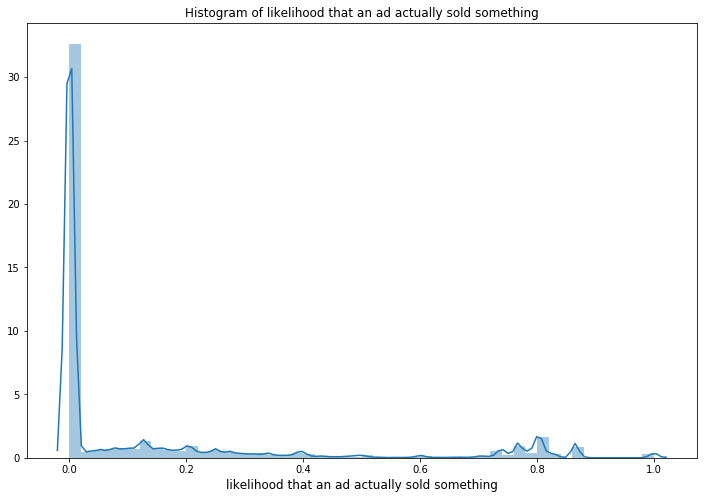

In [10]:
plt.figure(figsize = (12, 8))

sns.distplot(train['deal_probability'])
plt.xlabel('likelihood that an ad actually sold something', fontsize=12)
plt.title("Histogram of likelihood that an ad actually sold something")
plt.show() 

## Histogram and distribution of Ad price

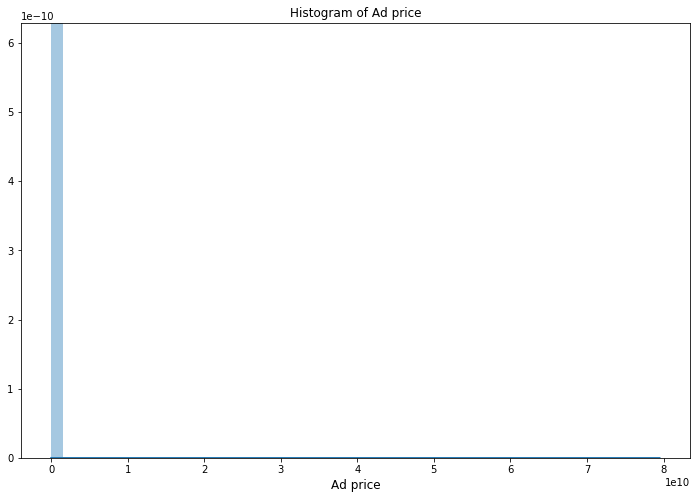

In [11]:
plt.figure(figsize = (12, 8))

sns.distplot(train['price'].dropna())
plt.xlabel('Ad price', fontsize=12)
plt.title("Histogram of Ad price")
plt.show()

### We define the variable Deal_Class that gathers deals of greater or lower than 0.5 probability

In [12]:
train['deal_class'] = train['deal_probability'].apply(lambda x: ">=0.5" if x >=0.5 else "<0.5")
temp = train['deal_class'].value_counts()
labels = temp.index
sizes = (temp / temp.sum())*100
trace = go.Pie(labels=labels, values=sizes, hoverinfo='label+percent')
layout = go.Layout(title='Distribution of deal class')
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

del train['deal_class']

## Relationship of the Price and the Deal Probability

/Users/sergigomezpalleja/anaconda3/envs/kaggle/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning:

divide by zero encountered in log



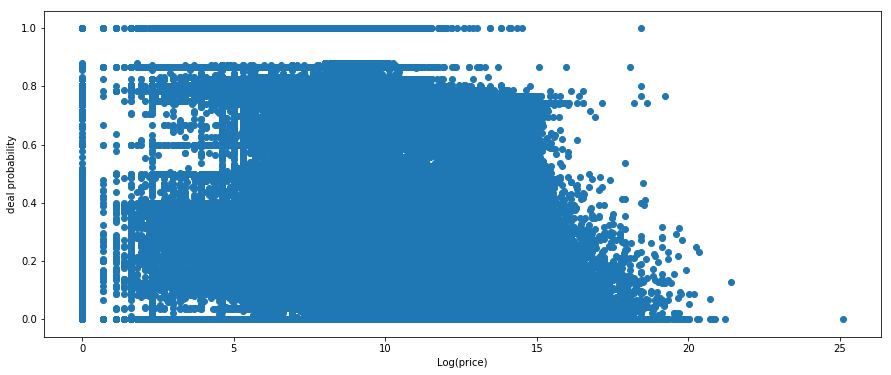

In [14]:
plt.figure(figsize=(15,6))
plt.scatter(np.log(train.price), train.deal_probability)
plt.xlabel('Log(price)')
plt.ylabel('deal probability')
plt.show()

## Map words from Russian to English

In [29]:
parent_category_name_map = {"Личные вещи" : "Personal belongings",
                            "Для дома и дачи" : "For the home and garden",
                            "Бытовая электроника" : "Consumer electronics",
                            "Недвижимость" : "Real estate",
                            "Хобби и отдых" : "Hobbies & leisure",
                            "Транспорт" : "Transport",
                            "Услуги" : "Services",
                            "Животные" : "Animals",
                            "Для бизнеса" : "For business"}

region_map = {"Свердловская область" : "Sverdlovsk oblast",
            "Самарская область" : "Samara oblast",
            "Ростовская область" : "Rostov oblast",
            "Татарстан" : "Tatarstan",
            "Волгоградская область" : "Volgograd oblast",
            "Нижегородская область" : "Nizhny Novgorod oblast",
            "Пермский край" : "Perm Krai",
            "Оренбургская область" : "Orenburg oblast",
            "Ханты-Мансийский АО" : "Khanty-Mansi Autonomous Okrug",
            "Тюменская область" : "Tyumen oblast",
            "Башкортостан" : "Bashkortostan",
            "Краснодарский край" : "Krasnodar Krai",
            "Новосибирская область" : "Novosibirsk oblast",
            "Омская область" : "Omsk oblast",
            "Белгородская область" : "Belgorod oblast",
            "Челябинская область" : "Chelyabinsk oblast",
            "Воронежская область" : "Voronezh oblast",
            "Кемеровская область" : "Kemerovo oblast",
            "Саратовская область" : "Saratov oblast",
            "Владимирская область" : "Vladimir oblast",
            "Калининградская область" : "Kaliningrad oblast",
            "Красноярский край" : "Krasnoyarsk Krai",
            "Ярославская область" : "Yaroslavl oblast",
            "Удмуртия" : "Udmurtia",
            "Алтайский край" : "Altai Krai",
            "Иркутская область" : "Irkutsk oblast",
            "Ставропольский край" : "Stavropol Krai",
            "Тульская область" : "Tula oblast"}

category_map = {"Одежда, обувь, аксессуары":"Clothing, shoes, accessories",
                "Детская одежда и обувь":"Children's clothing and shoes",
                "Товары для детей и игрушки":"Children's products and toys",
                "Квартиры":"Apartments",
                "Телефоны":"Phones",
                "Мебель и интерьер":"Furniture and interior",
                "Предложение услуг":"Offer services",
                "Автомобили":"Cars",
                "Ремонт и строительство":"Repair and construction",
                "Бытовая техника":"Appliances",
                "Товары для компьютера":"Products for computer",
                "Дома, дачи, коттеджи":"Houses, villas, cottages",
                "Красота и здоровье":"Health and beauty",
                "Аудио и видео":"Audio and video",
                "Спорт и отдых":"Sports and recreation",
                "Коллекционирование":"Collecting",
                "Оборудование для бизнеса":"Equipment for business",
                "Земельные участки":"Land",
                "Часы и украшения":"Watches and jewelry",
                "Книги и журналы":"Books and magazines",
                "Собаки":"Dogs",
                "Игры, приставки и программы":"Games, consoles and software",
                "Другие животные":"Other animals",
                "Велосипеды":"Bikes",
                "Ноутбуки":"Laptops",
                "Кошки":"Cats",
                "Грузовики и спецтехника":"Trucks and buses",
                "Посуда и товары для кухни":"Tableware and goods for kitchen",
                "Растения":"Plants",
                "Планшеты и электронные книги":"Tablets and e-books",
                "Товары для животных":"Pet products",
                "Комнаты":"Room",
                "Фототехника":"Photo",
                "Коммерческая недвижимость":"Commercial property",
                "Гаражи и машиноместа":"Garages and Parking spaces",
                "Музыкальные инструменты":"Musical instruments",
                "Оргтехника и расходники":"Office equipment and consumables",
                "Птицы":"Birds",
                "Продукты питания":"Food",
                "Мотоциклы и мототехника":"Motorcycles and bikes",
                "Настольные компьютеры":"Desktop computers",
                "Аквариум":"Aquarium",
                "Охота и рыбалка":"Hunting and fishing",
                "Билеты и путешествия":"Tickets and travel",
                "Водный транспорт":"Water transport",
                "Готовый бизнес":"Ready business",
                "Недвижимость за рубежом":"Property abroad"}

params_top35_map = {'Женская одежда':"Women's clothing",
                    'Для девочек':'For girls','Для мальчиков':'For boys','Продам':'Selling','С пробегом':'With mileage',
                    'Аксессуары':'Accessories','Мужская одежда':"Men's Clothing",'Другое':'Other','Игрушки':'Toys',
                    'Детские коляски':'Baby carriages', 'Сдам':'Rent','Ремонт, строительство':'Repair, construction',
                    'Стройматериалы':'Building materials','iPhone':'iPhone','Кровати, диваны и кресла':'Beds, sofas and armchairs',
                    'Инструменты':'Instruments','Для кухни':'For kitchen','Комплектующие':'Accessories','Детская мебель':"Children's furniture",
                    'Шкафы и комоды':'Cabinets and chests of drawers','Приборы и аксессуары':'Devices and accessories','Для дома':'For home',
                    'Транспорт, перевозки':'Transport, transportation','Товары для кормления':'Feeding products','Samsung':'Samsung','Сниму':'Hire',
                    'Книги':'Books','Телевизоры и проекторы':'Televisions and projectors','Велосипеды и самокаты':'Bicycles and scooters',
                    'Предметы интерьера, искусство':'Interior items, art','Другая':'Other','Косметика':'Cosmetics',
                    'Постельные принадлежности':'Bed dress','С/х животные' :'Farm animals','Столы и стулья':'Tables and chairs'}


train['region_en'] = train['region'].apply(lambda x : region_map[x])
train['parent_category_name_en'] = train['parent_category_name'].apply(lambda x : parent_category_name_map[x])
train['category_name_en'] = train['category_name'].apply(lambda x : category_map[x])

test['region_en'] = test['region'].apply(lambda x : region_map[x])
test['parent_category_name_en'] = test['parent_category_name'].apply(lambda x : parent_category_name_map[x])
test['category_name_en'] = test['category_name'].apply(lambda x : category_map[x])


del train['region']
del train['parent_category_name']
del train['category_name']
del test['region']
del test['parent_category_name']
del test['category_name']


## Boxplot Deal Probability by region

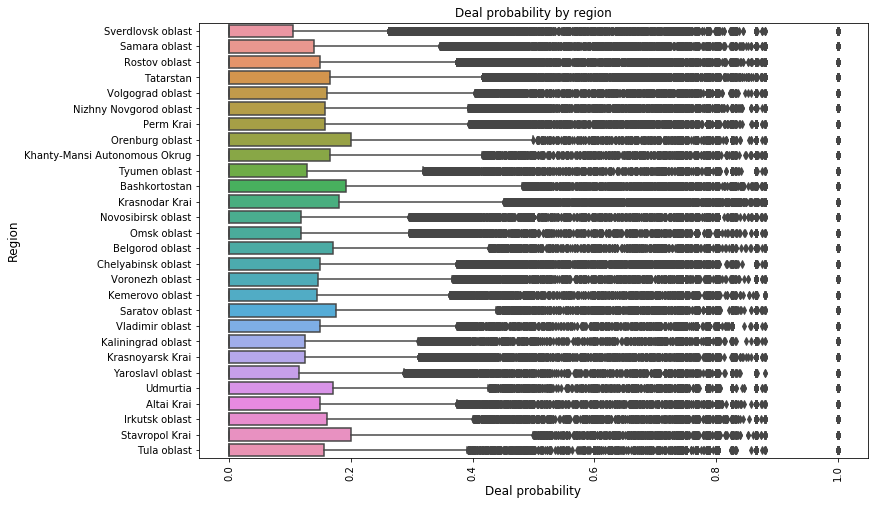

In [16]:
plt.figure(figsize=(12,8))
sns.boxplot(y="region_en", x="deal_probability", data=train)
plt.xlabel('Deal probability', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.title("Deal probability by region")
plt.xticks(rotation='vertical')
plt.show()

## Boxplot of the Deal Probability by Parent Category

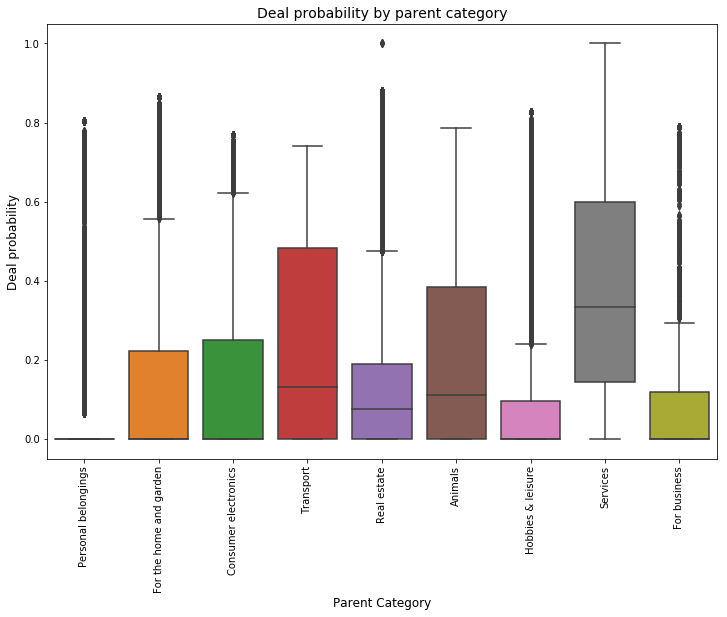

In [17]:
plt.figure(figsize=(12,8))
sns.boxplot(x="parent_category_name_en", y="deal_probability", data=train)
plt.ylabel('Deal probability', fontsize=12)
plt.xlabel('Parent Category', fontsize=12)
plt.title("Deal probability by parent category", fontsize=14)
plt.xticks(rotation='vertical')
plt.show()

# Data Transformation

## Encode Categorical Variables

In [5]:
#I keep a copy of the original data
train_copy = train.copy()
test_copy = test.copy()

In [6]:
# I combine both data sets
# But first I split Train - Dev - Test 
# Watch out: Do Train and Dev have the same distribution? 
train['set'] = 'train'
test['set'] = 'test'
test['deal_probability']= 0

df = pd.concat([train,test],axis=0)
print('\nAll Data shape: {} Rows, {} Columns'.format(*df.shape))
#df.shape[0] == train.shape[0] + test.shape[0]


All Data shape: 2011862 Rows, 19 Columns


In [7]:
print("Percentage of the Test set: ",100*test.shape[0] / df.shape[0])

Percentage of the Test set:  25.27201169861551


In [31]:
# All vars that we have
cat_vars = ["region_en", "city", "parent_category_name_en", "category_name_en", "user_type", "param_1", "param_2", "param_3"]
for col in cat_vars: 
    
    lbl_train = preprocessing.LabelEncoder()
    lbl_train.fit(list(train[col].values.astype('str')))
    train[col] = lbl_train.transform(list(train[col].values.astype('str')))
    
    lbl_test = preprocessing.LabelEncoder()
    lbl_test.fit(list(test[col].values.astype('str')))
    test[col] = lbl_test.transform(list(test[col].values.astype('str')))
    

In [9]:
# How our dataset looks like after the encoding
train.head(n = 3)

,item_id,user_id,city,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability,region_en,parent_category_name_en,category_name_en
0,b912c3c6a6ad,e00f8ff2eaf9,460,249,107,1162,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,1,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789,19,5,10
1,2dac0150717d,39aeb48f0017,1300,122,107,1162,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,1,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000,16,3,18
2,ba83aefab5dc,91e2f88dd6e3,1276,84,107,1162,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,1,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177,15,1,3


## Deal with Missing Data

In [34]:
#train['price_fill'] = train['price'].values
#train['price_fill'].fillna(np.nanmean(train["price"].values), inplace=True)

#train['price_log'] = np.log(train['price'])

# Feature Engineering

In [155]:
# If we want to re-start the feature engineering
#train = train_copy.copy()

### 1) Date time features

In [11]:
df['weekday'] = df['activation_date'].dt.weekday
df['month'] = df.activation_date.dt.month
df['day'] = df.activation_date.dt.day
df['week'] = df.activation_date.dt.week 
# test['activation_weekday'] = test['activation_date'].dt.weekday

del train['activation_date']

### 2) Length of the Description

In [157]:
# length of description
train['description'] = train['description'].fillna(" ")
train['description_len'] = train['description'].apply(lambda x : len(x.split()))

### 3) Length of the Title

In [158]:
train['title'] = train['title'].fillna(" ")
train['title_len'] = train['title'].apply(lambda x : len(x.split()))

### 4) Characters Length for the Text Columns

In [159]:
train['description_char'] = train['description'].apply(len)
train['title_char'] = train['title'].apply(len)
#train['param_char'] = train['param_combined'].apply(len)

### 5) Log to the Price

In [160]:
# log of price 
train['price_log'] = np.log(train['price'] + 0.001)
train['price_log'].fillna(-99, inplace=True)

# Baseline Model

### We keep the Target variable in a separate vector

In [161]:
train_y = train['deal_probability'].values

### We drop those variables that are not needed for this first model

In [162]:
cols_to_drop = ["item_id", "user_id", "title", "description", "image","price",
                "image_top_1"]
train_X = train.drop(cols_to_drop + ["deal_probability"], axis=1) # Important: We have also to remove the target variable !
#test_X = test_df.drop(cols_to_drop, axis=1)
print(train_X.head(n = 3))

   city  param_1  param_2  param_3  item_seq_number  user_type  region_en  \
0   460      249      107     1162                2          1         19   
1  1300      122      107     1162               19          1         16   
2  1276       84      107     1162                9          1         15   

   parent_category_name_en  category_name_en  weekday  month  day  week  \
0                        5                10        1      3   28    13   
1                        3                18        6      3   26    12   
2                        1                 3        0      3   20    12   

   description_len  title_len  description_char  title_char  price_log  
0                7          3                58          21   5.991467  
1                7          3                41          17   8.006368  
2               17          2                99          14   8.294050  


### We make sure there are no Missing Values in the Training and Validation Set

In [163]:
missings = train_X.isnull().sum().sort_values(ascending = False)
percentage = (train_X.isnull().sum() / train_X.isnull().count()*100).sort_values(ascending = False)
missing_training_data = pd.concat([missings,percentage], axis = 1, keys = ['Total', 'Percent'])
print(missing_training_data)

                         Total  Percent
price_log                    0      0.0
title_char                   0      0.0
param_1                      0      0.0
param_2                      0      0.0
param_3                      0      0.0
item_seq_number              0      0.0
user_type                    0      0.0
region_en                    0      0.0
parent_category_name_en      0      0.0
category_name_en             0      0.0
weekday                      0      0.0
month                        0      0.0
day                          0      0.0
week                         0      0.0
description_len              0      0.0
title_len                    0      0.0
description_char             0      0.0
city                         0      0.0


### Splitting Train / Validation Set

In [164]:
X_train_model, X_val, y_train_model, y_val = train_test_split(train_X, train_y, test_size=0.20, random_state=34)
print("Shape X_train_model: ", X_train_model.shape)
print("Shape y_train_model: ", y_train_model.shape)
print("Shape X_val: ", X_val.shape)
print("Shape y_val: ", y_val.shape)

Shape X_train_model:  (1202739, 18)
Shape y_train_model:  (1202739,)
Shape X_val:  (300685, 18)
Shape y_val:  (300685,)


### Fitting the model

In [165]:
linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train_model, y_train_model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Making the Prediction 

In [166]:
pred = linear_reg.predict(X_val)
print("number of observations with pred < 0: ",len(np.where(pred < 0)[0]))
print("number of observations with pred > 1: ",len(np.where(pred > 1)[0]))
#pred.clip(0.0, 1.0)
pred[np.where(pred < 0)] = 0
pred[np.where(pred > 1)] = 1
print("number of observations with pred < 0 after clipping: ",len(np.where(pred < 0)[0]))
print("number of observations with pred > 1 after clipping: ",len(np.where(pred > 1)[0]))

number of observations with pred < 0:  501
number of observations with pred > 1:  0
number of observations with pred < 0 after clipping:  0
number of observations with pred > 1 after clipping:  0


### Evaluate the predictions

In [167]:
rmse = np.sqrt(sk.metrics.mean_squared_error(y_val, pred))
print("The RMSE is: ", rmse)

The RMSE is:  0.25520410883152117


### Feature Selection 

In [168]:
coeffs = pd.DataFrame({"Feature":X_train_model.columns,"Coefficients":np.transpose(linear_reg.coef_)})
print(coeffs)

    Coefficients                  Feature
0      -0.000001                     city
1       0.000222                  param_1
2       0.000030                  param_2
3       0.000083                  param_3
4      -0.000002          item_seq_number
5       0.002407                user_type
6      -0.000140                region_en
7       0.004815  parent_category_name_en
8       0.000161         category_name_en
9       0.011046                  weekday
10      0.016819                    month
11     -0.010348                      day
12      0.071428                     week
13     -0.000612          description_len
14     -0.003234                title_len
15      0.000062         description_char
16      0.000216               title_char
17     -0.000438                price_log


In [169]:
X_sm = sm.add_constant(X_train_model)
lm_sm = sm.OLS(y_train_model, X_train_model)
res = lm_sm.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     2744.
Date:                Sun, 06 May 2018   Prob (F-statistic):               0.00
Time:                        18:45:29   Log-Likelihood:                -63784.
No. Observations:             1202739   AIC:                         1.276e+05
Df Residuals:                 1202721   BIC:                         1.278e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
city                    -1

In [55]:
import lightgbm as lgb

ModuleNotFoundError: No module named 'lightgbm'